
# Casusopdracht: definitieve data science pipeline

Dit onderzoek is gedaan op verzoek van de Hogeschool Utrecht voor het vak Computational Modelling, er moest op basis van een gekregen dataset een onderzoekvraag worden beantwoord. In dit onderzoek gaan we via een supervised learning model de vraag beantwoorden. We gaan data verzamlen en kijken analyseren, het opschonen van deze data om uiteindelijk correlaties te vinden tussen verschillende datapunten. We passen machine-learning toe om de onderzoeksvraag te beantwoorden en data te voorspellen. Hieruit zouden we conclusies kunnen trekken over onze dataset. Dit onderzoek is gepleegd door Adam Chebil

De hiervoor vermelde onderzoeksvraag luid: In hoeverre is de prijs van een speler te voorspellen aan de hand van zijn belangrijkste kenmerken?

De dataset bestaan uit een CSV bestand met meerdere attributen en karakteristieken over voetbal spelers. Attributen zoals club, salaris en fysieke eigenschappen. 




In [128]:
# importeren van libaries.
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import altair as alt
from scipy import stats
import seaborn as sns
from scipy.integrate import quad
import scipy
import statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import whiten
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor

import shap

# Data Collection

Eerst gaan we kijken naar de data en een beter begrip vormen voor dat we aan de dataset aan de slag gaan. Om hiermee te beginnen moeten we eerst de data verzamelen. Dit doen we door de ruwe data te importeren. De data is al gegeven en verzameld, maar nog niet opgeschoont.

In [46]:
# Het inladen van de datasets.
df = pd.read_csv('fifa19.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data exploration & analysis

Eerst gaan we grondig kijken naar onze dataset om wat conclusies te trekken en zodat we weten waar we aantoe zijn. We gaan eerst kijken naar de .info() van de dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Zoals we zein zitter er 18207 rijen aan data met 89 kolommen. De type kolommen bevatten kwantitatieve (int of float) van 44 kolommen en nominale variabelen (object) van 45 kollomen. Bij verschillende soorten supervised learning algoritmes (zoals linear regression) kan er alleen gebruik gemaakt worden van kwantitatieve variabelen, daarvoor zullen we dus in de data processing sectie de dataset de variabelen omzetten van of naar kwantitatieve variablen zodra de features zijn bepaald.

Hierin zien we ook dat er aardig wat verschil is tussen het aantal 'non-null' entries zitten tussen de kolommen. Al is dat minder het geval bij alleen de kwantitatieve kolommen. Het laat zien dat het nodig zal zijn om rijen te verwijderen met zulke NaN entries. Dit kunnen we het beste doen na het bepalen welke kolommen gebruikt zullen worden voor het model. hierdoor verwijderen we geen rijen die alleen NaN values hebben in kolommen die we niet gebruiken.





Als we kijken naar de onderzoeksvraag zien we dat de 'Value' kolom de variable is daar we op willen trainen. Maar we weten nog niet welke andere kolommen bruikbaar zijn voor ons model. Om te beginnen zullen we eerst assessen welke variables een correlatie hebben met de target variable. Hier zullen we dus eerst een correaltie-lijst maken, dat een lijst is van correlatie-coefficienten tussen elke kwantitatieve variable en de target variablen.

Hierna gaan we de ordinale variabelen omzetten naar een kwantitatieve versie om daarop hetzelfde proces op toe te passen.

Daarna zullen we een correlatie matrix maken van alle kwantitatieve variabelen dat een bruikbare correlatie hadden met de target variable. We zullen hiermee kijken welke variablen een extreem hoge correlatie hebben met elkaar.

Om dit te kunnen doen moeten we Value eerst omzetten in een ordinale variabelen. Deze waarden zijn cijfers maar in string vorm, dus laten we ze naar ints omzetten maar de grootte bewaren.

We zullen daarna ook met wat scatterplots de correlatie tonen, en daarna met boxplots laten zien of er outliers zien die er verwijdert kunnen worden.

In [143]:
# Het filteren van kwantitatieve variablen.
dataset_kwan = []
dataset_nom = []
  
dataset_kwan = list(df.select_dtypes(exclude=['object']).columns)
dataset_nom = list(df.select_dtypes(include=['object']).columns)
# Zet de cijfers van value om in echte cijfers
valuenrs = np.unique(df['Value'])
valueints = []
for i in valuenrs:
    if i[-1] == 'M':
        valueints.append(float(i[1:-1]) * 1000000)
    elif i[-1] == 'K':
        valueints.append(float(i[1:-1]) * 1000)
    else:
        valueints.append(0)

# laat elke int 'value' corresponderen met elke string 'value'
valuenrs2 = df['Value']
valuenrs2 = valuenrs2.replace(valuenrs, valueints)

# voeg de nieuwe variable toe aan de dataset
df['Value_num'] = valuenrs2

df[['Value', 'Value_num']].head(100)



,Value,Value_num
0,€110.5M,110500000.0
1,€77M,77000000.0
2,€118.5M,118500000.0
3,€72M,72000000.0
4,€102M,102000000.0
...,...,...
95,€30M,30000000.0
96,€26M,26000000.0
97,€37.5M,37500000.0
98,€30.5M,30500000.0


In [144]:
# Meet hoeveel correlatie er is tussen de target variable en elke feature variable
df[dataset_kwan].corr()['Value_num'].sort_values()

Nationality_labeled        -0.009965
Club_labeled               -0.001522
Weight_num                  0.045943
Skill Moves                 0.315651
ShortPassing                0.327623
Vision                      0.357639
Special                     0.377738
Composure                   0.450352
Reactions                   0.540552
Potential                   0.576218
Overall                     0.627085
International Reputation    0.653176
Wage_num                    0.858442
Release Clause_num          0.994352
Value_num                   1.000000
Name: Value_num, dtype: float64

We gaan nu kijken naar alle nominale "object" kolommen om even direct te kijken wat nodig zal zijn om te analyseren

In [50]:
pd.set_option('display.max_columns', 100)
df[dataset_nom]

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,Medium/ Medium,Messi,Yes,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,€226.5M
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,High/ Low,C. Ronaldo,Yes,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,€127.1M
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,High/ Medium,Neymar,Yes,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,€228.1M
3,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,Medium/ Medium,Lean,Yes,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€138.6M
4,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,High/ High,Normal,Yes,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,Right,Medium/ Medium,Lean,No,CM,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,€143K
18203,N. Christoffersson,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,€113K
18204,B. Worman,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,€165K
18205,D. Walker-Rice,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,Right,Medium/ Medium,Lean,No,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,€143K


We kunnen al gelijk wat kolommen zien die niks anders zijn dat fotos, links. Daarnaast heb je ook wat kolom gegevens waaronder redelijke aanname we kunnen zeggen het niet van toepassing is zoals de naam, 'real face', 'loaned from'.

Daarna zien we juist wat kolommen die erg bruikbaar kunnen zijn, zoals height, wieght, releas clause, en wage.

Daarna heb je wat kolommen die misschien iets kunnen zeggen, zoals nationaliteit en club. Deze zijn wat moeilijker om te zetten naar een getal om de correlatie te bepalen. We kunnen hier het beste dan kijken of het gemmidelde salaris (value) ver afwijkt van een ander salaris op basis van de categorie.

Highest: United Arab Emirates: 0.08860759493670886
Lowest: Puerto Rico: 0.0009282700421940928
Difference: 0.08767932489451477


<AxesSubplot:xlabel='Nationality'>

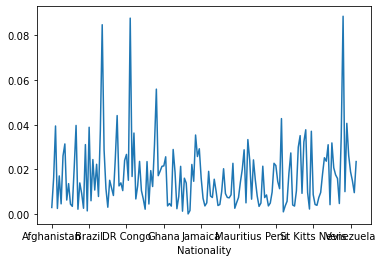

In [51]:
scaler = MinMaxScaler()
df['Value_num_norm'] = scaler.fit_transform(df['Value_num'].values.reshape(-1,1))
value_per_nat = df.groupby('Nationality').mean()["Value_num_norm"]

nonzero = value_per_nat.loc[(value_per_nat != 0)]
highest = nonzero.loc[nonzero == nonzero.max()]
lowest = nonzero.loc[nonzero == nonzero.min()]

print("Highest: {}: {}".format(highest.index[0], highest[0]))
print("Lowest: {}: {}".format(lowest.index[0], lowest[0]))
print("Difference: {}".format(highest[0] - lowest[0]))
value_per_nat.plot.line()

Highest: Juventus: 28179000.0
Lowest: Bray Wanderers: 83913.04347826086
Difference: 28095086.95652174


<AxesSubplot:xlabel='Club'>

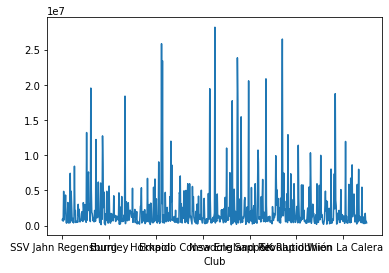

In [52]:
value_per_nat = df.groupby('Club').mean()["Value_num"]
nonzero = value_per_nat.loc[(value_per_nat != 0)]
highest = nonzero.loc[nonzero == nonzero.max()]
lowest = nonzero.loc[nonzero == nonzero.min()]

print("Highest: {}: {}".format(highest.index[0], highest[0]))
print("Lowest: {}: {}".format(lowest.index[0], lowest[0]))
print("Difference: {}".format(highest[0] - lowest[0]))

value_per_nat.plot.line()

Hier kunnen we zien dat zelfs bij het normalizeren van de value kolom er nog duidelijk verschil kan zitten in de mediaan van de spelers. Er kunnen miljoenen tussen landen zitten van bijna de laagste tot hoogst mogelijke waarden. De meeste zitten dan wel tussen onder de 50% van mogelijk waardes, maar zelfs daartussen zit er vaak nog wel wat verschillen. 

Hierbij kunnen we de concluderen dat het nog best handig kan zijn om deze waardes mee te nemen. We zullen na het gebruiken van deze waarden ook nog even dubbel nakijken wat de scores van de modellen zullen zijn zonder deze kolommen, als dat we eigenlijk ook met meerdere waardes kunnen doen. We moeten dan wel opletten dat het verwijderen van uitscheiters en verwijderen van NaN values opnieuw wordt berekent bij het weg halen van deze kolommen.

We gaan nu kijken naar de correlatie van de height, wieght, releas clause, en wage kolommen.

In [53]:
for cat in ["Release Clause", "Wage"]:
    valuenrs = df[cat].dropna().unique()
    valueints = []
    for i in valuenrs:
        if i[-1] == 'M':
            valueints.append(float(i[1:-1]) * 1000000)
        elif i[-1] == 'K':
            valueints.append(float(i[1:-1]) * 1000)
        else:
            valueints.append(0)

    # laat elke int 'value' corresponderen met elke string 'value'
    valuenrs2 = df[cat]
    valuenrs2 = valuenrs2.replace(valuenrs, valueints)

    # voeg de nieuwe variable toe aan de dataset
    df[cat+"_num"] = valuenrs2

    df[[cat, cat+"_num"]].head(100)

We turn the weight and height with a slightly different method, we also convert the height
column into whole inches rather than feet and inches

In [54]:
df['Weight_num'] = pd.to_numeric(dfcopy['Weight'].str[:3], errors='ignore')
df['Height_num'] = pd.to_numeric(dfcopy['Height'].str[0]) * 12 + pd.to_numeric(df['Height'].str[-1])
df[["Release Clause_num", "Release Clause", "Weight", "Weight_num",
        "Height", "Height_num", "Wage", "Wage_num"]]

,Release Clause_num,Release Clause,Weight,Weight_num,Height,Height_num,Wage,Wage_num
0,226500000.0,€226.5M,159lbs,159.0,5'7,67.0,€565K,565000.0
1,127100000.0,€127.1M,183lbs,183.0,6'2,74.0,€405K,405000.0
2,228100000.0,€228.1M,150lbs,150.0,5'9,69.0,€290K,290000.0
3,138600000.0,€138.6M,168lbs,168.0,6'4,76.0,€260K,260000.0
4,196400000.0,€196.4M,154lbs,154.0,5'11,61.0,€355K,355000.0
...,...,...,...,...,...,...,...,...
18202,143000.0,€143K,134lbs,134.0,5'9,69.0,€1K,1000.0
18203,113000.0,€113K,170lbs,170.0,6'3,75.0,€1K,1000.0
18204,165000.0,€165K,148lbs,148.0,5'8,68.0,€1K,1000.0
18205,143000.0,€143K,154lbs,154.0,5'10,60.0,€1K,1000.0


In [55]:
"""Meet hoeveel correlatie er is tussen de target variable en elke feature variable"""
df[["Release Clause_num", "Weight_num", "Height_num", "Wage_num", 'Value_num']].corr()['Value_num'].sort_values()

Height_num            0.012206
Weight_num            0.045943
Wage_num              0.858442
Release Clause_num    0.994352
Value_num             1.000000
Name: Value_num, dtype: float64

We zien dat vooral de height en erg kleine correlatie heeft ten opzichte van de andere features

We zien hier algemeen dat de variable zoals Overall, poteential release clause, wage, en international reputations de grootste correlatie hebben met de target variable. We zullen voor nu een r>0.30 nemen als bruikbare feature variablen.

In [56]:
"""Labelize the categorical columns to add them to the features"""
lb_make = LabelEncoder()
df['Nationality_labeled'] = lb_make.fit_transform(df['Nationality'])
df['Club_labeled'] = lb_make.fit_transform(df['Club'])

In [57]:
features = ['Skill Moves','ShortPassing'
              , 'Vision','Special','Composure','Reactions','Potential','Overall' 
              , 'International Reputation', "Release Clause_num", "Weight_num"
              , "Wage_num", "Nationality_labeled", "Club_labeled", 'Value_num', 'Value']

print(df[features].info())
df[features]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Skill Moves               18159 non-null  float64
 1   ShortPassing              18159 non-null  float64
 2   Vision                    18159 non-null  float64
 3   Special                   18207 non-null  int64  
 4   Composure                 18159 non-null  float64
 5   Reactions                 18159 non-null  float64
 6   Potential                 18207 non-null  int64  
 7   Overall                   18207 non-null  int64  
 8   International Reputation  18159 non-null  float64
 9   Release Clause_num        16643 non-null  float64
 10  Weight_num                18159 non-null  float64
 11  Wage_num                  18207 non-null  float64
 12  Nationality_labeled       18207 non-null  int32  
 13  Club_labeled              18207 non-null  int32  
 14  Value_

,Skill Moves,ShortPassing,Vision,Special,Composure,Reactions,Potential,Overall,International Reputation,Release Clause_num,Weight_num,Wage_num,Nationality_labeled,Club_labeled,Value_num,Value
0,4.0,90.0,94.0,2202,96.0,95.0,94,94,5.0,226500000.0,159.0,565000.0,6,212,110500000.0,€110.5M
1,5.0,81.0,82.0,2228,95.0,96.0,94,94,5.0,127100000.0,183.0,405000.0,123,326,77000000.0,€77M
2,5.0,84.0,87.0,2143,94.0,94.0,93,92,5.0,228100000.0,150.0,290000.0,20,435,118500000.0,€118.5M
3,1.0,50.0,68.0,1471,68.0,90.0,93,91,4.0,138600000.0,168.0,260000.0,139,375,72000000.0,€72M
4,4.0,92.0,94.0,2281,88.0,91.0,92,91,4.0,196400000.0,154.0,355000.0,13,374,102000000.0,€102M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,2.0,49.0,52.0,1307,45.0,49.0,65,47,1.0,143000.0,134.0,1000.0,46,165,60000.0,€60K
18203,2.0,43.0,33.0,1098,42.0,40.0,63,47,1.0,113000.0,170.0,1000.0,144,587,60000.0,€60K
18204,2.0,38.0,43.0,1189,41.0,47.0,67,47,1.0,165000.0,148.0,1000.0,46,122,60000.0,€60K
18205,2.0,42.0,47.0,1228,46.0,21.0,66,47,1.0,143000.0,154.0,1000.0,46,586,60000.0,€60K


Hieronder zien we de correlatie tussen de feature variablen van de top 8 feature variables die het meeste correlatie hadden met de target variable. We zien dat ze inderdaad ook een correlatie met elkaar bevatten maar niet groot genoeg om te zeggen dat ze sommige redundant zijn.

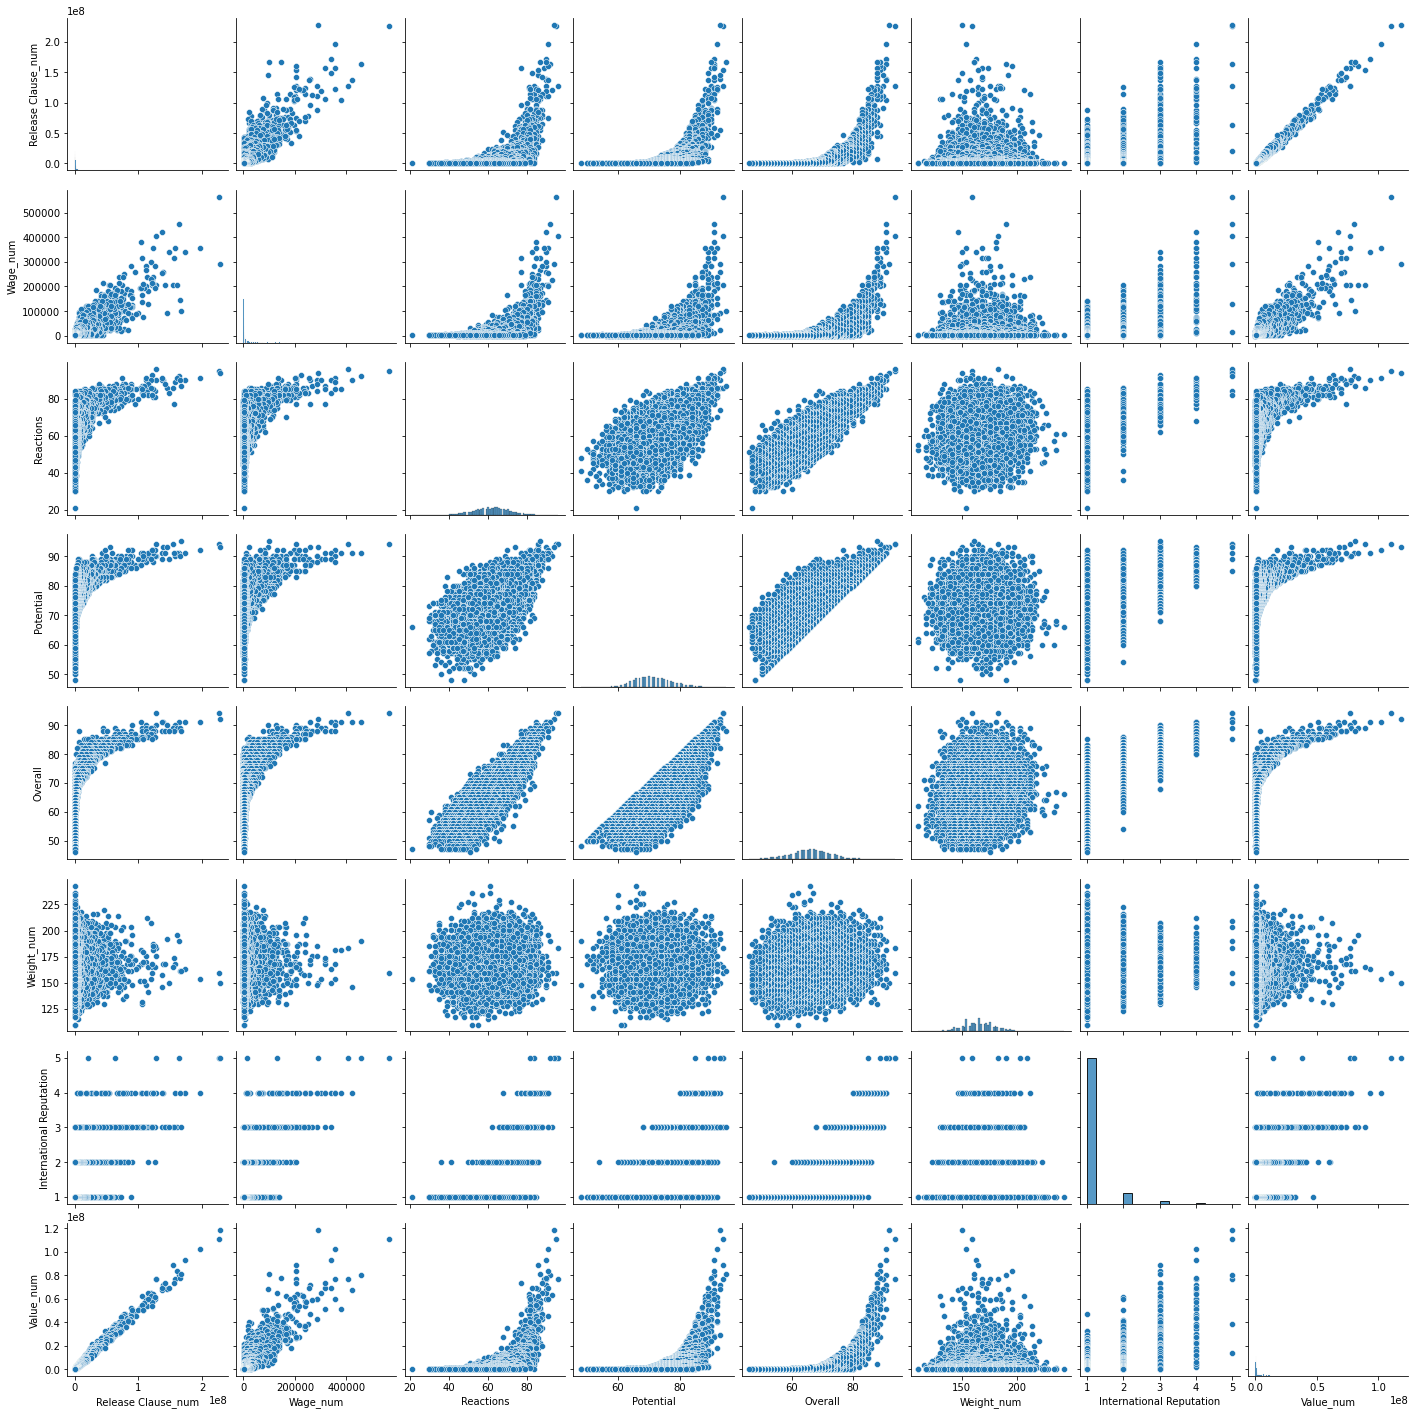

In [58]:
sns.pairplot(dfcopy[["Release Clause_num", "Wage_num", "Reactions", "Potential", 
                    "Overall", "Weight_num", "International Reputation", "Value_num"]])


We zien uit deze matrix dat er voor heel de features inderdaad best wat correlatie zit. Bij de reputatie zien we dat hoogst mogelijke value beinvloed wordt door de reputatie. Daarna heb je nog de release clause dat bijna een 1 op 1 correlatie geeft, dat veelbelovend is en hoogstwaarscheinlijk de belangrijste feature zal worden. 

Daarna heb je nog de weight dat van hoog naar laag gaat met de value ten opzichte van het gewicht. Dit heeft waarscheinlijk te maken met dat spelers met een laag gewicht vaak minder spiermassa hebben dan zwaardere spelers en dus minder kracht kunnen zetten, terwijl spelers met een hoog gewicht misschien juist langzamer worden door hun extra spiermassa.

Daarna zien we dat attributen dat voornamelijk met de presentatie van de speler te maken heeft (reaction, overal, etc) een exponentiele groei heeft. Dit zou door 2 redenen kunnen komen. Eerst zijn fysieke attributen binnen sport exponentieeel moeilijker om te verbeteren. Het verschil tussen 5km/u en 10km/u kunnen rennen is minder zwaar dan 10km/u en 15km/u bijvoorbeeld. Je kan dus veel meer waardevol worden als je alnog die extra zet kan geven. 

Ook zou het kunnen komen dat spelers met betere attributen minder vaak voorkomen, en dat de aantal spelers met een bepaalde reactietijd exponentieel afneemt des te verder we kijken. Een kleiner aanbod zorgt vaak voor een grotere waarde. 

In [59]:
df[features].corr()

,Skill Moves,ShortPassing,Vision,Special,Composure,Reactions,Potential,Overall,International Reputation,Release Clause_num,Weight_num,Wage_num,Nationality_labeled,Club_labeled,Value_num
Skill Moves,1.000000,0.730363,0.674057,0.763412,0.586836,0.377044,0.354290,0.414463,0.208153,0.310851,-0.351209,0.263205,-0.011748,-0.000453,0.315651
ShortPassing,0.730363,1.000000,0.713524,0.906729,0.685137,0.483028,0.369189,0.502550,0.242803,0.322969,-0.290366,0.296691,0.003803,-0.001804,0.327623
Vision,0.674057,0.713524,1.000000,0.761992,0.636280,0.502536,0.348141,0.498894,0.284600,0.351472,-0.284113,0.315395,0.009753,0.000278,0.357639
Special,0.763412,0.906729,0.761992,1.000000,0.752331,0.597169,0.383727,0.606960,0.292208,0.369321,-0.267830,0.347835,-0.005249,0.001644,0.377738
Composure,0.586836,0.685137,0.636280,0.752331,1.000000,0.685558,0.440008,0.727655,0.392787,0.441679,-0.034444,0.419597,-0.009070,0.014886,0.450352
Reactions,0.377044,0.483028,0.502536,0.597169,0.685558,1.000000,0.513425,0.850045,0.445614,0.532099,0.086364,0.495560,-0.013660,-0.003138,0.540552
Potential,0.354290,0.369189,0.348141,0.383727,0.440008,0.513425,1.000000,0.660939,0.372993,0.586751,-0.006947,0.486413,0.007352,-0.009508,0.576218
Overall,0.414463,0.502550,0.498894,0.606960,0.727655,0.850045,0.660939,1.000000,0.499491,0.616422,0.154634,0.571926,-0.011851,0.004937,0.627085
International Reputation,0.208153,0.242803,0.284600,0.292208,0.392787,0.445614,0.372993,0.499491,1.000000,0.641156,0.088340,0.668635,-0.004652,0.002761,0.653176
Release Clause_num,0.310851,0.322969,0.351472,0.369321,0.441679,0.532099,0.586751,0.616422,0.641156,1.000000,0.039847,0.855922,-0.003527,0.012743,0.994352


# Data processing

We gaan in deze sectie de dataset aanpassen om klaar te maken voor gebruik. We zullen hier de data set aanpassen door alleen de benodigde features over te houden door alleen de nodige kolommen uit halen die volgens de data analyse bruikbaar waren voor het model. De targetvariable zijn de laatste 2 kolommen in de processed dataset.

In [113]:
df = df[features]
df

,Skill Moves,ShortPassing,Vision,Special,Composure,Reactions,Potential,Overall,International Reputation,Release Clause_num,Weight_num,Wage_num,Nationality_labeled,Club_labeled,Value_num,Value
0,4.0,90.0,94.0,2202,96.0,95.0,94,94,5.0,226500000.0,159.0,565000.0,6,212,110500000.0,€110.5M
1,5.0,81.0,82.0,2228,95.0,96.0,94,94,5.0,127100000.0,183.0,405000.0,123,326,77000000.0,€77M
2,5.0,84.0,87.0,2143,94.0,94.0,93,92,5.0,228100000.0,150.0,290000.0,20,435,118500000.0,€118.5M
3,1.0,50.0,68.0,1471,68.0,90.0,93,91,4.0,138600000.0,168.0,260000.0,139,375,72000000.0,€72M
4,4.0,92.0,94.0,2281,88.0,91.0,92,91,4.0,196400000.0,154.0,355000.0,13,374,102000000.0,€102M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,2.0,49.0,52.0,1307,45.0,49.0,65,47,1.0,143000.0,134.0,1000.0,46,165,60000.0,€60K
18203,2.0,43.0,33.0,1098,42.0,40.0,63,47,1.0,113000.0,170.0,1000.0,144,587,60000.0,€60K
18204,2.0,38.0,43.0,1189,41.0,47.0,67,47,1.0,165000.0,148.0,1000.0,46,122,60000.0,€60K
18205,2.0,42.0,47.0,1228,46.0,21.0,66,47,1.0,143000.0,154.0,1000.0,46,586,60000.0,€60K


# Data cleaning

We zullen nu met de overgebleven data gaan werken om het op te schonen. Dit houd vooral in dat we NaN/none values verwijderen en outliers te verwijderen. 

Eerst gaan we kijken of het mogelijk is om elke row met NaN values te verwijderen zonder dat de dataset te klein hierdoor word. Als dat niet zo is verwijderen we alle rows met NaN values.

Daarna zullen we de outliers verwijderen met behulp van een zscore.

In [114]:
print(df.shape)
df_cleaned = df.dropna()
print(df_cleaned.shape)

(18207, 16)
(16643, 16)


In [119]:
z_scores = stats.zscore(df_cleaned[featurevar[:-2]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned_copy = df_cleaned[filtered_entries]
df_cleaned_copy

,Skill Moves,ShortPassing,Vision,Special,Composure,Reactions,Potential,Overall,International Reputation,Release Clause_num,Weight_num,Wage_num,Nationality_labeled,Club_labeled,Value_num,Value
133,1.0,15.0,53.0,1132,48.0,83.0,84,84,2.0,37400000.0,187.0,74000.0,54,72,22000000.0,€22M
191,3.0,73.0,65.0,1849,85.0,81.0,83,83,2.0,32300000.0,194.0,64000.0,78,351,19000000.0,€19M
197,1.0,30.0,41.0,1222,52.0,81.0,84,83,2.0,37300000.0,181.0,42000.0,59,574,21000000.0,€21M
212,1.0,34.0,42.0,1299,63.0,77.0,83,83,2.0,31800000.0,203.0,55000.0,139,61,15500000.0,€15.5M
222,1.0,34.0,37.0,1191,55.0,76.0,83,83,2.0,22100000.0,181.0,33000.0,115,297,13000000.0,€13M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,2.0,25.0,31.0,1098,43.0,43.0,68,47,1.0,153000.0,168.0,1000.0,126,629,60000.0,€60K
18202,2.0,49.0,52.0,1307,45.0,49.0,65,47,1.0,143000.0,134.0,1000.0,46,165,60000.0,€60K
18203,2.0,43.0,33.0,1098,42.0,40.0,63,47,1.0,113000.0,170.0,1000.0,144,587,60000.0,€60K
18204,2.0,38.0,43.0,1189,41.0,47.0,67,47,1.0,165000.0,148.0,1000.0,46,122,60000.0,€60K


# Baseline
Hier gaan we beginnen met een simpel begin van een baseline. het model. Hierin gaan we nog niet kijken de trainset grootte, verwijderde outliers en welke features we meenemen. We gaan makkelijk beginnen met het bekijken van de RMSE en MAE wanneer we de mediaan als uitslag voor elke speler gebruiken.

In [99]:
temp = df_cleaned_copy
temp["mean"] = df_cleaned_copy['Value_num'].mean()
base_rmse = np.sqrt(mean_squared_error(df_cleaned_copy['Value_num'], temp["mean"]))
base_mae = metrics.mean_absolute_error(df_cleaned_copy['Value_num'], temp["mean"])
print("MAE: {}".format(base_mae))
print("RMSE: {}".format(base_rmse))

MAE: 1769937.5174553483
RMSE: 2694542.673757667


<ipython-input-99-ee6b2c7d1d8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["mean"] = df_cleaned_copy['Value_num'].mean()


We zien hier dat de waardes best hoog liggen omdat we met grootte waardes rekenen. Voor deze redenen gaan we kiezen om RMSE als score te gebruiken. RMSE is beter in termen van het weergeven van prestaties bij het omgaan met grote foutwaarden. https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/



Hierna gaan we beginnen met het model. We beginnen bij het maken van een KNN regressor model met alle features tot zo ver gekozen, daarna kijken we wat de MAE en MRSE zijn van het model en zullen we ook kijken hoe we dit kunnen verhogen. 

We beginnen eerst met het splitten van de dataset.

In [100]:
#Organiseer de data
X = np.array(df_cleaned_copy[features[:-2]])
y = df_cleaned_copy['Value_num']

#Creëer een train- en validatieset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

In [101]:
# kiezen van model
neigh = KNeighborsRegressor(n_neighbors=3)
#train het model
neigh.fit(X_train, y_train)
#valideer het model
y_pred = neigh.predict(X_test)
print("Model RMSE:    {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Baseline RMSE: {}".format(base_rmse))

Model RMSE:    369076.2252291599
Baseline RMSE: 2694542.673757667


We zien dat het gebruiken van een KNN regression model een veel betere RMSE score geeft dan die van de baseline model. We zullen nu even kijken hoe we de score omlaag kunnen halen.

Eerst gaan we kijken naar verschillende Parameters voor de k value.



Text(0, 0.5, 'Scores')

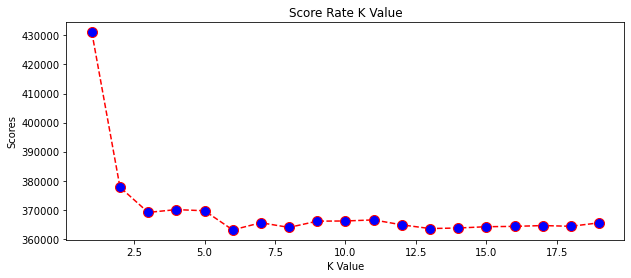

In [102]:
"""Plot effect ot the accuracy based on the K value"""
rmse_scores = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("Current K calculating: {}".format(i), end="\r")  # \r to flush output


# plot score figure
plt.figure(figsize=(10, 4))
plt.plot(range(1, 20), rmse_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Scores')

We zien hier dat een k=6 value de laagste RMSE geeft. Zal er een verschil zijn als we de distance anders berekenen?

In [103]:
# kiezen van model
for i in ["uniform", "distance"]:
    neigh = KNeighborsRegressor(n_neighbors=17, weights=i)
    #train het model
    neigh.fit(X_train, y_train)
    #valideer het model
    y_pred = neigh.predict(X_test)
    print("{} RMSE:    {}".format(i, np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

uniform RMSE:    364557.0421692919
distance RMSE:    336948.4786652882


In [104]:
for i in ["euclidean", "hamming", "manhattan", "minkowski"]:
    neigh = KNeighborsRegressor(n_neighbors=6, metric=i, weights="distance")
    #train het model
    neigh.fit(X_train, y_train)
    #valideer het model
    y_pred = neigh.predict(X_test)
    print("{} RMSE:    {}".format(i, np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

euclidean RMSE:    348145.74178843154
hamming RMSE:    1586728.1482603871
manhattan RMSE:    345044.78493185673
minkowski RMSE:    348145.74178843154


We zien hier dat een k=6 value, een metric van de manhattan distance, en een weights=disntance de laagste RMSE geven. 

We gaan nu kijken naar de waardes die we krijgen als we de input data aanpassen. We gaan beginnen bij het gebruiken van verschillende outlier grenzen. Bij een grens van <2.5 gaan er te veel datapunten verwijdert worden, bij >5 wordt er ongeveer niks verwijdert. We zullen dus alles daartusen berekenen.

Text(0, 0.5, 'Scores')

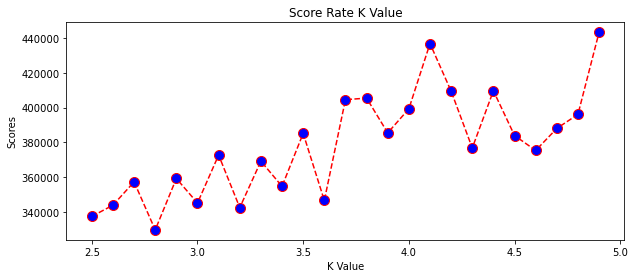

In [122]:
rmse_scores = []
for i in np.arange(2.5, 5, 0.1):
    print("Current z calculating: {}".format(i), end="\r")  # \r to flush output
    z_scores = stats.zscore(df_cleaned[featurevar[:-2]])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < i).all(axis=1)
    df_cleaned_copy = df_cleaned[filtered_entries]

    #Organiseer de data
    X = np.array(df_cleaned_copy[features[:-2]])
    y = df_cleaned_copy['Value_num']

    #Creëer een train- en validatieset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)
    
    neigh = KNeighborsRegressor(n_neighbors=6, metric="manhattan", weights="distance")
    #train het model
    neigh.fit(X_train, y_train)
    #valideer het model
    y_pred = neigh.predict(X_test)
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
# plot score figure
plt.figure(figsize=(10, 4))
plt.plot(np.arange(2.5, 5, 0.1), rmse_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Scores')

We zien dat bij een z_score grens van 2.8 de beste waarde is voor het verwijderen van outliers. We zien ook dat het niet te veel datapunten dan verwijdert. We zien ook dat dit een verbetering is van de grenswaarden van 3 waarmee we begonnen.

In [125]:
print(df_cleaned.shape)

z_scores = stats.zscore(df_cleaned[featurevar[:-2]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.8).all(axis=1)
df_cleaned_copy = df_cleaned[filtered_entries]
    
print(df_cleaned_copy.shape)


(16643, 16)
(15538, 16)


In [126]:
#Organiseer de data
X = np.array(df_cleaned_copy[features[:-2]])
y = df_cleaned_copy['Value_num']

#Creëer een train- en validatieset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)


Dan zullen we nog als laatst gaan kijken naar de belangstelling van de features. Welke kolommen nou daadwerkelijk nodig zijn. We kunnen elke combinatie van features proberen. Maar met zelfs al 10 features (6 minder dan we daadwerkelijk hebben) is dat al 10! = 3628800 mogelijke combinaties.

We kunnen een shap model gebruiken die door het gebruik van shaply values beredeneerd hoe belangrijk een feature is. Gebaseerd daarop zullen we de top n nemen (n zal gebaseerd zijn op de uitslag.)

In [129]:
neigh = KNeighborsRegressor(n_neighbors=6, metric="manhattan", weights="distance")
#train het model
neigh.fit(X_train, y_train)
#valideer het model
y_pred = neigh.predict(X_test)

feat100 = shap.utils.sample(X_train, 100) # 100 instances for use as the background distribution
#X_train_summary = shap.kmeans(X_train, 10)
explainerKNN = shap.KernelExplainer(neigh.predict, feat100)
shap_values_KNN_train = explainerKNN.shap_values(feat100)

  0%|          | 0/100 [00:00<?, ?it/s]

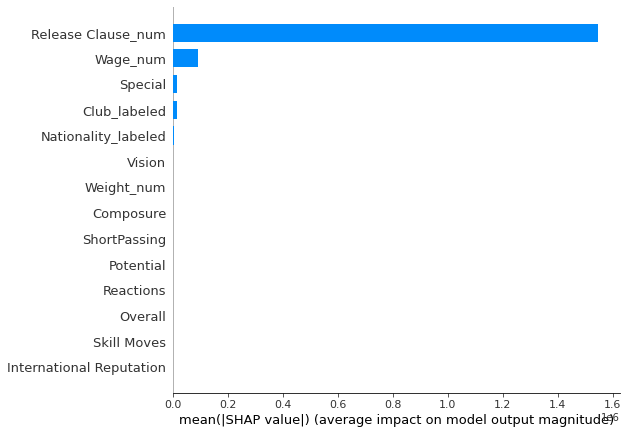

In [130]:
shap.summary_plot(shap_values_KNN_train, feat100, plot_type="bar", feature_names = features)

 We krijgen hetzelfde resultaat als we did alles handmatig beredeneren door eerst kijken welke features verwijderen het minste invloed heeft op de MRSE, die zullen we dan verwijderen, de features die overblijven word het zelfde process op gedaan todat er nog 5 overblijven.

In [133]:
features = ['Skill Moves', 'ShortPassing', 'Vision', 'Special', 
              'Composure', 'Reactions', 'Potential', 'Overall', 
              'International Reputation', 'Release Clause_num', 
              'Weight_num', 'Wage_num', 'Nationality_labeled', 
              'Club_labeled']

copy_features = features.copy()

while len(copy_features) > 5:
    current_score = -1 # Start score
    for index, val in enumerate(copy_features):
        temp_features = copy_features.copy()
        del temp_features[index]

        #Organiseer de data
        X = np.array(df_cleaned_copy[temp_features])
        y = df_cleaned_copy['Value_num']

        #Creëer een train- en validatieset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

        neigh = KNeighborsRegressor(n_neighbors=6, metric="manhattan", weights="distance")
        #train het model
        neigh.fit(X_train, y_train)
        #valideer het model
        y_pred = neigh.predict(X_test)
        mrse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        if mrse < current_score or current_score == -1:
            current_score = mrse
            worst_feat = val
            
    print(worst_feat)
    copy_features.remove(worst_feat)
    
print(copy_features)


Skill Moves
International Reputation
ShortPassing
Vision
Potential
Reactions
Overall
Composure
Weight_num
['Special', 'Release Clause_num', 'Wage_num', 'Nationality_labeled', 'Club_labeled']


We kunnen hier zien welke dat de 2 verschillende feature sets weinig van elkaar verschillen met de MRSE, een verschil van 1.212 (een verlaging is van 0,35 procent). Dit geeft veel inzicht op welke waarde en persoon in het echt op zou moeten letten om de waarde van een speler te berekenen. 

In [141]:
    #Organiseer de data
    two_feature_sets = [features, ['Special', 'Release Clause_num', 'Wage_num', 'Nationality_labeled', 'Club_labeled']] 
    
    for featset in two_feature_sets:
        X = np.array(df_cleaned_copy[featset])
        y = df_cleaned_copy['Value_num']

        #Creëer een train- en validatieset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

        neigh = KNeighborsRegressor(n_neighbors=6, metric="manhattan", weights="distance")
        #train het model
        neigh.fit(X_train, y_train)
        #valideer het model
        y_pred = neigh.predict(X_test)
        KNN_mrse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        print("Feature set length: {} \nMRSE: {}".format(len(featset), KNN_mrse))
    print("Max:  {}".format(df_cleaned_copy["Value_num"].max()))
    print("Min:  {}".format(df_cleaned_copy["Value_num"].min()))

Feature set length: 14 
MRSE: 329570.258896623
Feature set length: 5 
MRSE: 330782.6639887954
Max:  22500000.0
Min:  10000.0


Het is te zien dat de score hier inderdaad meer mee omhoog gaat. Met dit model kunnen we de waarde van een speler bepalen met een Root mean squared error van 330782,66. 

Als we kijken naar de variablen die veel invloed hebben op deze voorspellingen kunnen we ook wel zien waarom dat komt. Variablen zoals de nationaliteit en club zeggen dus blijbaar best wel wat over de waarde van de speler. De club kan opzichzelf al een hoge waarde hebben waardoor de spelers binnen die club dat dan ook krijgen. De nationaliteit kan door veel redenen van invloed zijn. De presentatie van een speler kan minder hoog zijn wanneer ze van een armer land komen. 

Daarna heb je ook de release clause. Die was het meest belangrijk voor het model en dat is dan ook niet zo raar. De release clause is letterlijk de 'minimum hoeveelheid dat een verkoper berijd is te krijgen voor een speler.' Je kan daarmee al snel zien waarom die dan sterk de speler hun waarde beinvloed. 

We kunnen ook kijken naar variable die we niet hebben gebruikt zoals Age. Je zou denken dat de leeftijd veel invloed zou hebben op een speler zijn waarde. Maar je zou kunnen bedenken dat jonge en oude spelers beide goede en slechte kanten kunnen hebben. jonge spelers hebben misschien wel een gezonder lichaam, maar hebben ook vaak minder ervaring. Ook gaan spelers vaak als snel met pentioen en wordt er vaak selectief gekeken naar iemands leeftijd voor ze mee mogen doen aan een club. Hier onstaat dan ook een bias in de data wat het minder bruikbaar maakt. 

Wat de data wel moeilijker maakt om te interpreteren is het idee dat voetbal vooral een amusement sport is. Wat dus kan betekenen dat hoe mensen een speler subjectief zien invloed kan hebben op zijn populariteit en dus ook zijn waarde, dat iemand er knap uitziet, een goeie PR team heeft, of erg charismatisch is kan de waarde beinvloeden. 



# Conclusie
In conclusie, om de onderzoeksvraag te beantwoorden. Ja, het is mogelijk om op zeker hoogte de waarde van een speler te bepalen. De laagste RMSE die we kregen binnen deze notebook was 329570.25 (300 duizend). Gezien we werken met waarden tot wel 22500000 (22 miljoen) is dit een redelijke score om mee te werken.
